 Download Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumonia


Libraries

In [ ]:
import os
import torch
from fastai.vision.all import *

In [ ]:
os.listdir(path+ "/chest_xray")

['chest_xray', '__MACOSX', 'val', 'test', 'train']

DataLoader with all the information

In [ ]:
dls = ImageDataLoaders.from_folder(
    path + "/chest_xray",
    train = "train",
    valid = "test",
    seed = 42,
    item_tfms = Resize(128),
    batch_tfms = aug_transforms()
)

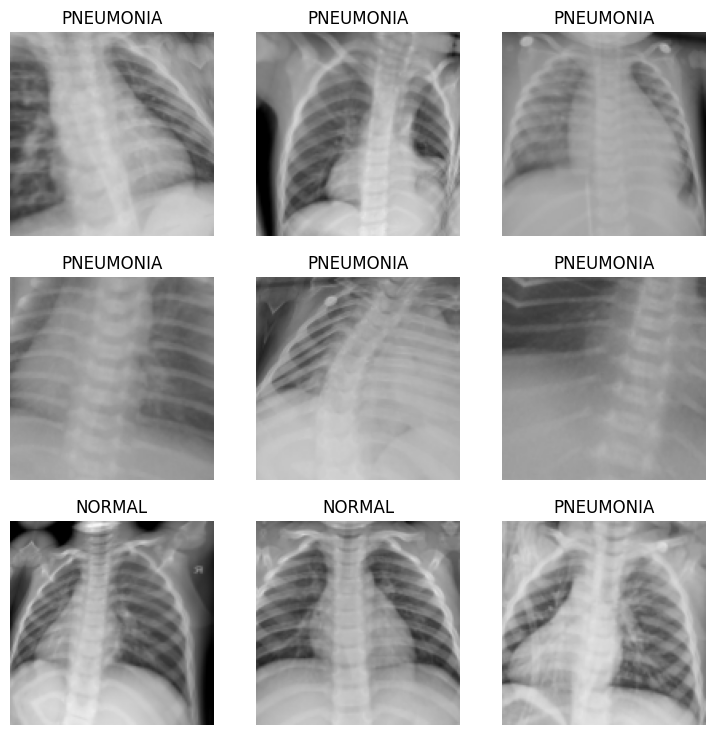

In [ ]:
dls.show_batch(max_n = 9)

Make Model and train it

In [6]:
model = vision_learner(dls, resnet50, metrics = accuracy)
model.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 187MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.598512,0.690782,0.796474,01:47


epoch,train_loss,valid_loss,accuracy,time
0,0.296004,0.538316,0.841346,02:00


epoch,train_loss,valid_loss,accuracy,time
0,0.296004,0.538316,0.841346,02:00
1,0.219511,0.555970,0.833333,01:46
2,0.178893,0.498416,0.836538,01:46
3,0.129961,0.515483,0.830128,01:41
4,0.101393,0.431476,0.858974,01:45
5,0.089978,0.426540,0.863782,01:50
6,0.091646,0.453055,0.857372,01:44
7,0.075230,0.492150,0.838141,01:47
8,0.067096,0.466342,0.850962,01:46
9,0.075323,0.456151,0.854167,01:48


See the Results

In [7]:
interpret = ClassificationInterpretation.from_learner(model)

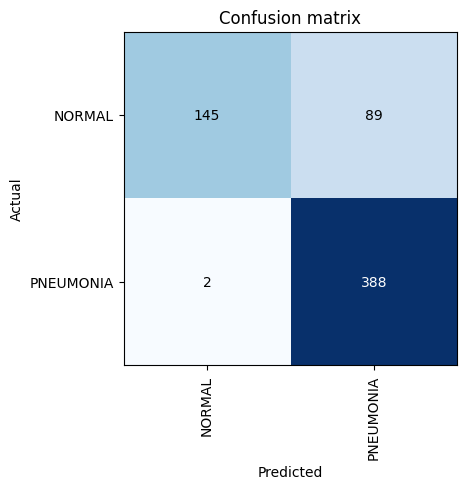

In [8]:
interpret.plot_confusion_matrix()

Predict on Images

In [13]:
test_image_path = "/content/IMG-20250821-WA0029.jpg"
pred_class, class_index, probs = model.predict(test_image_path)
print(pred_class)

PNEUMONIA


<Axes: title={'center': 'Prediction: PNEUMONIA | Probability:0.9960'}>

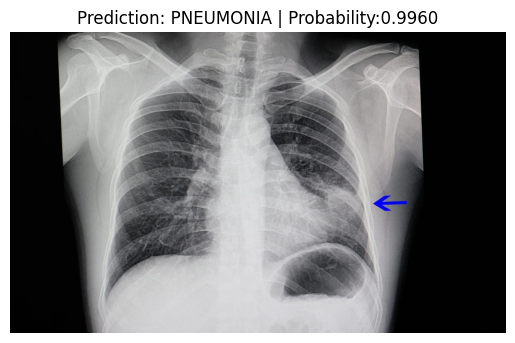

In [14]:
img = PILImage.create(test_image_path)
img.show(ctx=plt.gca(), title=f"Prediction: {pred_class} | Probability:{probs[class_index]:.4f}")

In [15]:
test_image_path1 = "/content/image.jpg"
pred_class, class_index, probs = model.predict(test_image_path1)
print(pred_class)

NORMAL


<Axes: title={'center': 'Prediction: NORMAL | Probability:0.9863'}>

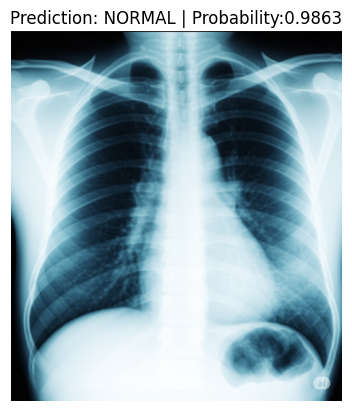

In [16]:
img = PILImage.create(test_image_path1)
img.show(ctx=plt.gca(), title=f"Prediction: {pred_class} | Probability:{probs[class_index]:.4f}")